In [100]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import sys
import numpy as np
import glob
import torch

sys.path.insert(1,"/home/showalte/research/prob_seq_queries/")
from seq_queries.utils import read_pkl, write_pkl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:
ref = [
    "In my opinion ... ",
    "            go ... ",
    "Hi, my name is ... ",
    "                    Where is ... ",
    "Once upon a ...",
    "Would you ...",
    "                Say ...",
]
    
    

In [114]:
path = "../data/flashy/flashy_gpt2/val_dl/val-dl_flashy_gpt2_flashy_1000mc.pkl"
data = read_pkl(path)

In [115]:
# print(data.keys())
df = data['intermediate_query_probs'][:,:,[30,13,0,26]]

In [116]:
# for i in range(7):
#     plt.figure(figsize = (12,8))
#     plt.bar(range(21),df[i].sum(dim=-1).numpy(),label=ref[i])
#     plt.legend()
#     plt.ylim(0,0.13)
#     plt.show()

In [117]:
df_list = []
for i in range(df.shape[0]):
    tdf = pd.DataFrame(df[i].sum(dim=-1).numpy())
    tdf['label'] = ref[i]
    tdf['step'] = list(range(1,22,1))
    df_list.append(tdf)
    # print(df[0].shape)
fdf = pd.concat(df_list,axis=0)
# fdf['step'] -= 0
# fdf[fdf.step == 0] = 0
fdf.shape
fdf = fdf[fdf.step < 15]
fdf.columns = ['x','g','Steps in Sequence']
fdf.head()

,x,g,Steps in Sequence
0,0.000098,In my opinion ...,1
1,0.003309,In my opinion ...,2
2,0.006042,In my opinion ...,3
3,0.012425,In my opinion ...,4
4,0.012305,In my opinion ...,5


/home/showalte/.conda/envs/nlpenv/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


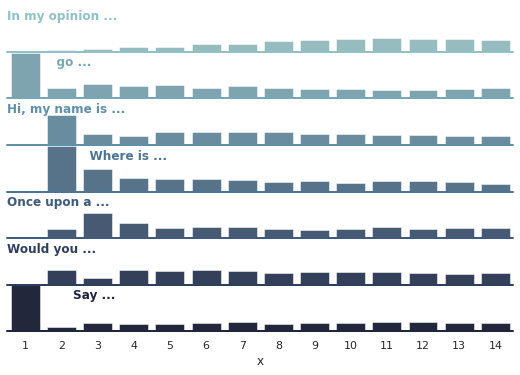

In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# # Create the data
# rs = np.random.RandomState(1979)
# x = rs.randn(500)
# g = np.tile(list("ABCDEFGHIJ"), 50)
# df = pd.DataFrame(dict(x=x, g=g))
# m = df.g.map(ord)
# print(df.head())
# df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(7, rot=-.25, light=.7)
g = sns.FacetGrid(fdf, row="g", hue="g", aspect=10, sharey=True,ylim=(0,0.11), height=0.8, palette=pal)

# Draw the densities in a few steps
g.map(sns.barplot,'Steps in Sequence','x',
      fill=True, alpha=1, linewidth=0.5)
# g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .8, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=.03)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
# supxlabel("Steps")
g.despine(bottom=True, left=True)

## Flashy Apps

In [202]:
path = "../data/flashy/flashy_apps/val_dl/val-dl_flashy_apps_flashy_10000mc.pkl"
data = read_pkl(path)

In [203]:
# print(data['intermediate_query_probs'].shape)
# data = torch.LongTensor(samples).unsqueeze(-1)
# print(data)
# data = data.expand(9,16)
# data.shape

In [204]:
samples = [45,85,47,31,8,65,67,9,57]
lst = ['Mine','youtube','netflix','hulu','calculator','settings','snapchat','calendar','reddit']
left = torch.gather(data['intermediate_query_probs'],-1,
                    torch.LongTensor(samples).unsqueeze(-1).expand(9,16).unsqueeze(-1))
print(left.shape)
print(data['intermediate_query_probs'].shape)
tots = data['intermediate_query_probs'].sum(dim=-1) - left.squeeze()

torch.Size([9, 16, 1])
torch.Size([9, 16, 88])


In [205]:
df_list = []
for i in range(tots.shape[0]):
    tdf = pd.DataFrame(tots[i].numpy())
    tdf['label'] = lst[i]
    tdf['step'] = list(range(1,tots.shape[1]+1,1))
    df_list.append(tdf)
    # print(df[0].shape)
fdf = pd.concat(df_list,axis=0)
# fdf['step'] -= 0
# fdf[fdf.step == 0] = 0
fdf.shape
fdf = fdf[fdf.step < 5]
fdf.columns = ['x','g','y']
# fdf['x'] = np.log(fdf.x + 1e-5)
fdf.head()

,x,g,y
0,0.862466,Mine,1
1,0.135973,Mine,2
2,0.001560,Mine,3
3,0.000002,Mine,4
0,0.210578,youtube,1


/home/showalte/.conda/envs/nlpenv/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


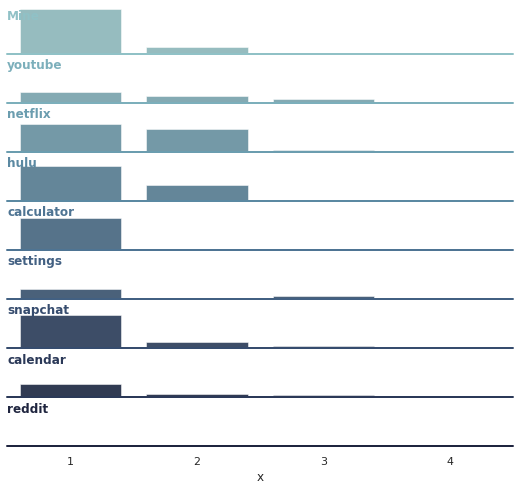

In [206]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(9, rot=-.25, light=.7)
g = sns.FacetGrid(fdf, row="g", hue="g", aspect=10, sharey=True, height=0.8, palette=pal)

# Draw the densities in a few steps
g.map(sns.barplot,'y','x',
      fill=True, alpha=1, linewidth=0.5)
# g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .8, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=.03)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
# supxlabel("Steps")
g.despine(bottom=True, left=True)